In [446]:
source("~/public/SiyuanLuo/projects/benchmark/scripts/evaluation/lib_metrics.R")
source("~/public/SiyuanLuo/projects/benchmark/scripts/clustering/lib_clustering.R")
source("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/visual_utils.R")

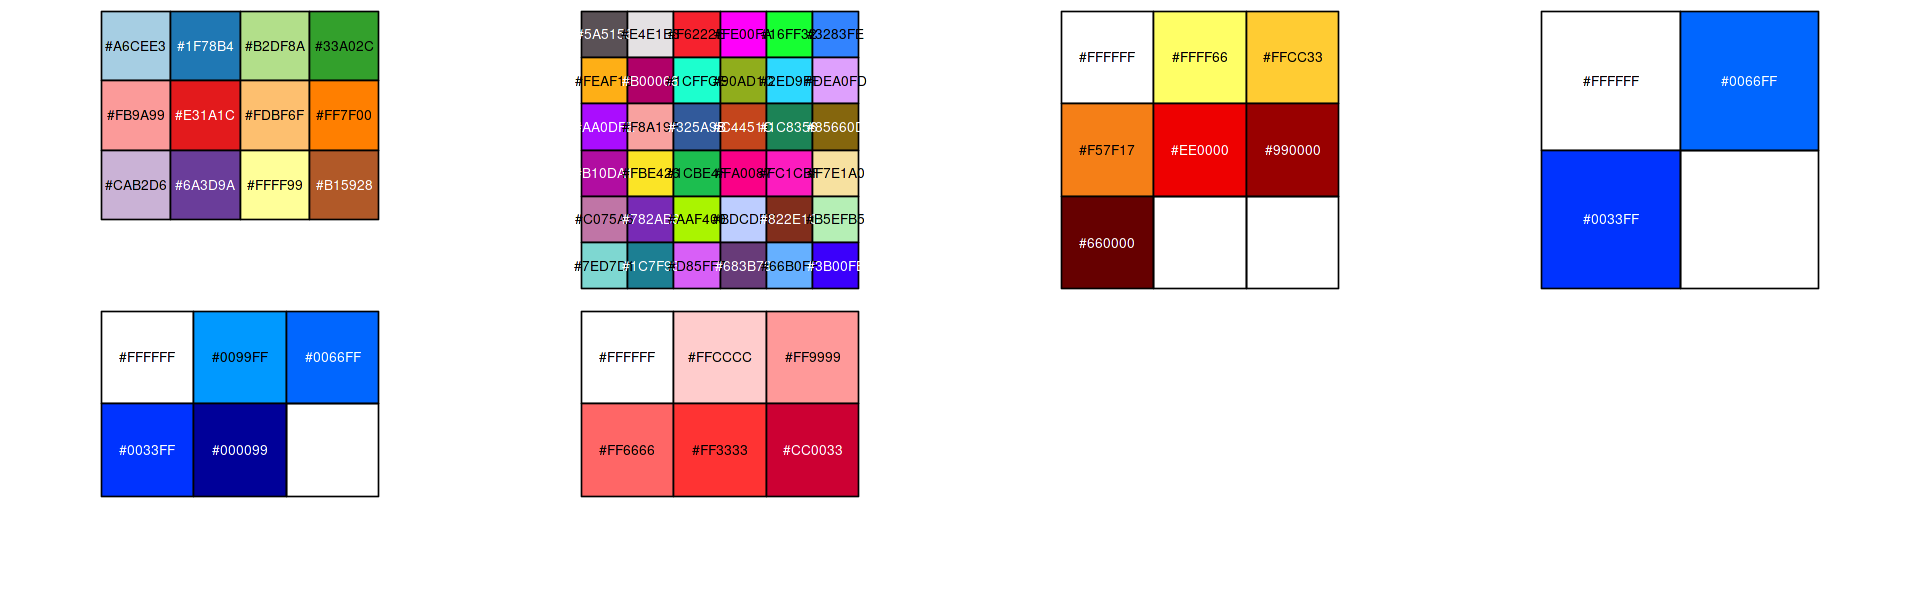

In [194]:
options(repr.plot.width=16, repr.plot.height=5)
par(mfrow=c(2,4))

show_col(my_col_m)
show_col(my_col_c)
show_col(my_color_1)
show_col(my_color_2)
show_col(my_color_3)
show_col(my_color_4)

In [3]:
# dataset_ls <- c("Buenrostro_2018", "candidate1", "Cell_line_mixing", "Chen_2019",  "PBMC_multiomics", "candidate2", "Ma_2019") 
# k_ls <- c(9, 13, 10, 13, 15, 10, 22)
dataset_ls <- c("Cell_line_mixing", "candidate1",  "candidate2", "Buenrostro_2018",  "Chen_2019",  "PBMC_multiomics") 
dataset_name <- c("Cell line mixing experiment", "human adult atlas subset1", "human adult atlas subset2",  "Buenrostro2018", "Chen2019", "10X PBMC multiomics")
k_ls <- c(10, 13, 10, 9, 13, 15)

In [19]:
# Put meta files of all datasets together
for(j in 1:length(dataset_ls)){
    dataset <- dataset_ls[j]
    k_optimal <- k_ls[j]
    if(j == 1){
        df <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
        df_metrics <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metrics_value.tsv"), sep="\t", header=TRUE)
        df$dataset <- dataset_name[j]
        df$dataset2 <- dataset_ls[j]
        df_metrics$dataset <- dataset_name[j]
        df$k_optimal <- k_optimal
        df_metrics$k_optimal <- k_optimal
        df_metrics$dataset2 <- dataset_ls[j]
    }else{
        df1 <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
        df1$dataset <- dataset_name[j]
        df1$k_optimal <- k_optimal
        df1$dataset2 <- dataset_ls[j]
        
        df <- rbind(df, df1)
        df_metrics1 <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metrics_value.tsv"), sep="\t", header=TRUE)
        df_metrics1$dataset <- dataset_name[j]
        df_metrics1$k_optimal <- k_optimal
        df_metrics1$dataset2 <- dataset_ls[j]
        df_metrics <- rbind(df_metrics, df_metrics1)
    }
}


In [20]:
head(df)

,file,scenario,workflow,method,feature_type,tile_size,distance,ndim,filename,resolution,rds_file,clustering_file,long_method,snn_file,n_clusters,dataset,dataset2,k_optimal
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
1,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.05_metrics.tsv,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,10,Cell line mixing experiment,Cell_line_mixing,10
2,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.1_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.1_metrics.tsv,0.10,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.1_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.1.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,11,Cell line mixing experiment,Cell_line_mixing,10
3,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.15_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.15_metrics.tsv,0.15,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.15_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.15.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,11,Cell line mixing experiment,Cell_line_mixing,10
4,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.2_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.2_metrics.tsv,0.20,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.2_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.2.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,12,Cell line mixing experiment,Cell_line_mixing,10
5,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.25_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.25_metrics.tsv,0.25,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.25_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.25.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,12,Cell line mixing experiment,Cell_line_mixing,10
6,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.3_metrics.tsv,Cell_line_mixing,evaluation,Signac,by_cluster_peaks,0,default,15,r0.3_metrics.tsv,0.30,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.3_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.3.tsv,Signac_by_cluster_peaks,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,12,Cell line mixing experiment,Cell_line_mixing,10


In [21]:
head(df_metrics)

,n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file,dataset,k_optimal,dataset2
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,10,ARI,0.9661907,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,Cell line mixing experiment,10,Cell_line_mixing
2,10,AMI,0.9576516,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,Cell line mixing experiment,10,Cell_line_mixing
3,10,MI,2.0681147,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,Cell line mixing experiment,10,Cell_line_mixing
4,10,VI,0.1749132,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,Cell line mixing experiment,10,Cell_line_mixing
5,10,Silhouette,0.3064498,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,Cell line mixing experiment,10,Cell_line_mixing
6,10,Silhouette_label,0.3155830,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv,Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS,Cell line mixing experiment,10,Cell_line_mixing


# Fig 2

## Fig 2A: ARI

In [5]:
df_metrics_ari <- df_metrics %>% filter(metric == "ARI") %>% filter(ndim == 15)
df_metrics_ari$dataset <- factor(df_metrics_ari$dataset, levels = dataset_name)

In [6]:
vline_data <- data.frame(dataset = dataset_name, vline_x = k_ls)
vline_data$dataset <- factor(vline_data$dataset, levels = dataset_name)

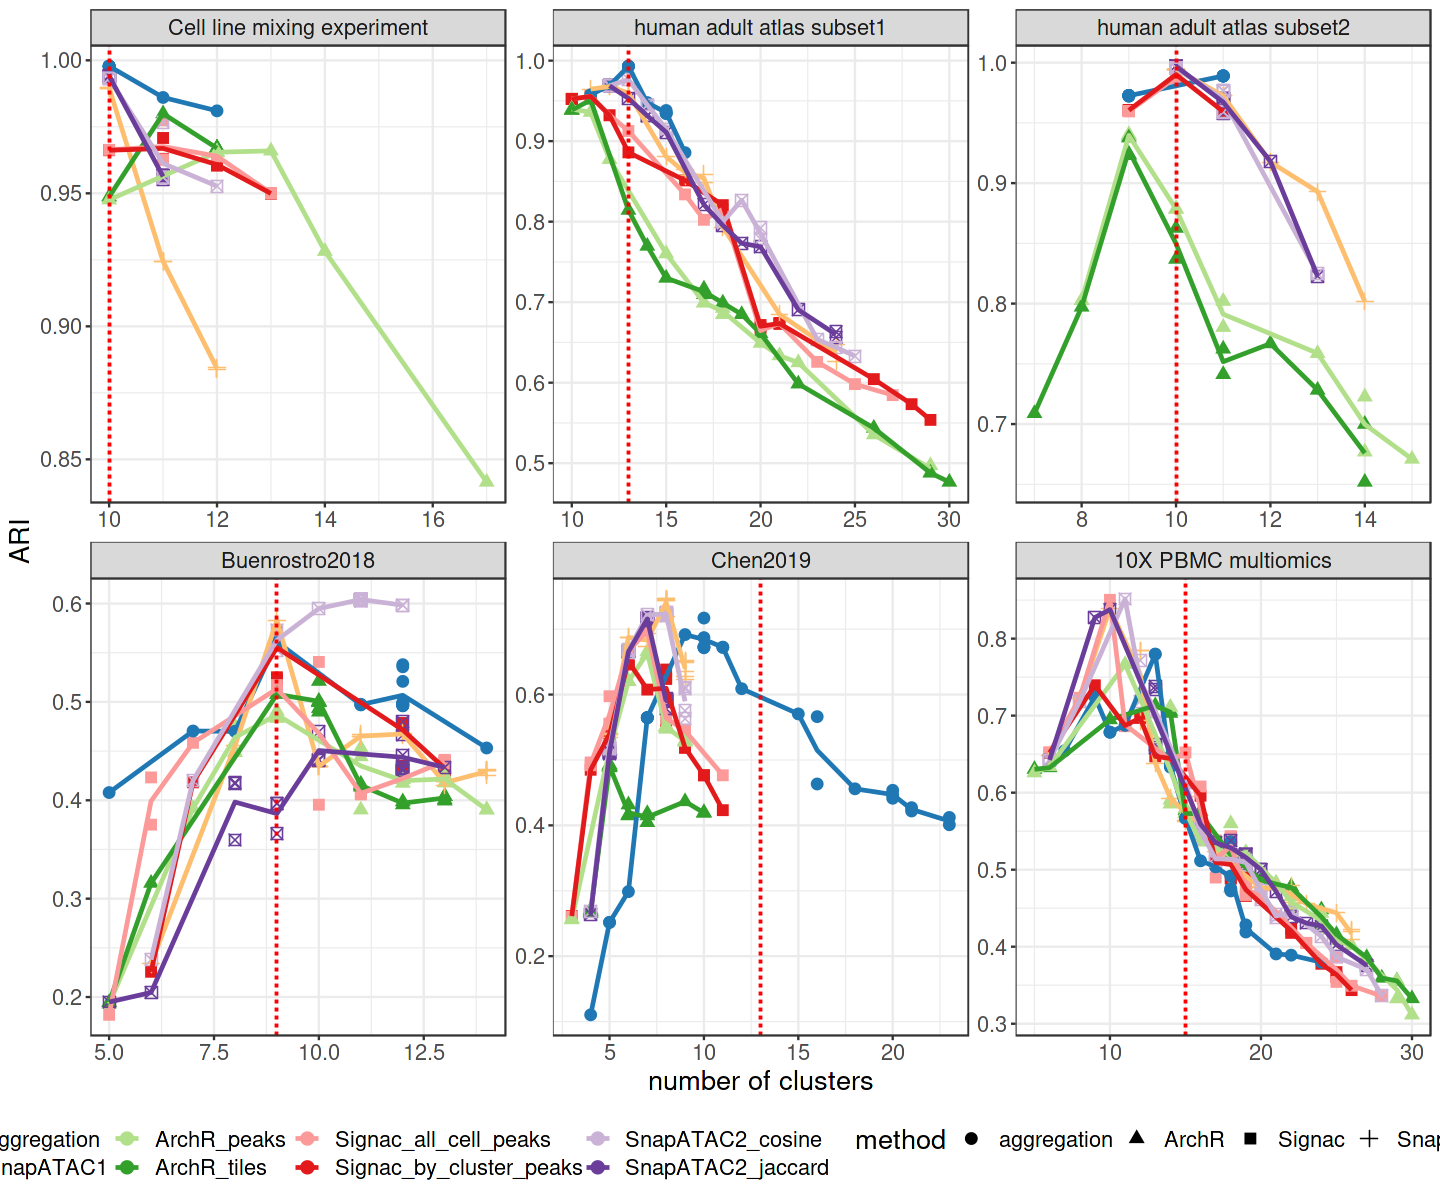

In [454]:
# ARI
options(repr.plot.width=12, repr.plot.height=10)
df_metrics_ari$long_method <- factor(df_metrics_ari$long_method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p1 <-
df_metrics_ari %>% #filter(n_clusters <= 30) %>% #filter(long_method=="SnapATAC2_cosine") %>% #filter(grepl(n,ndim)) %>%
  group_by(dataset, long_method, n_clusters) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=long_method, shape=method)) + 
  geom_point(size=3) +
  geom_line(size=1, aes(x=n_clusters, y=mean_value, color=long_method)) + 
  facet_wrap(~dataset, scales = "free", nrow = 2, ncol = 3) + 
  geom_vline(data = vline_data, aes(xintercept = vline_x), linetype = "dashed", color = "red", size=0.8) + 
  xlab("number of clusters") +
  ylab("ARI") +
  labs(color="Method") +
  # geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
  theme_bw() +
  theme(text = element_text(size = 16),legend.position = "bottom") +
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
  scale_colour_manual(values = my_col_m3) #+ ylim(0, 0.8)
p1

In [448]:
my_col_m3 <- brewer.pal(10, "Paired")[c(2,7,3:6,9:10)]

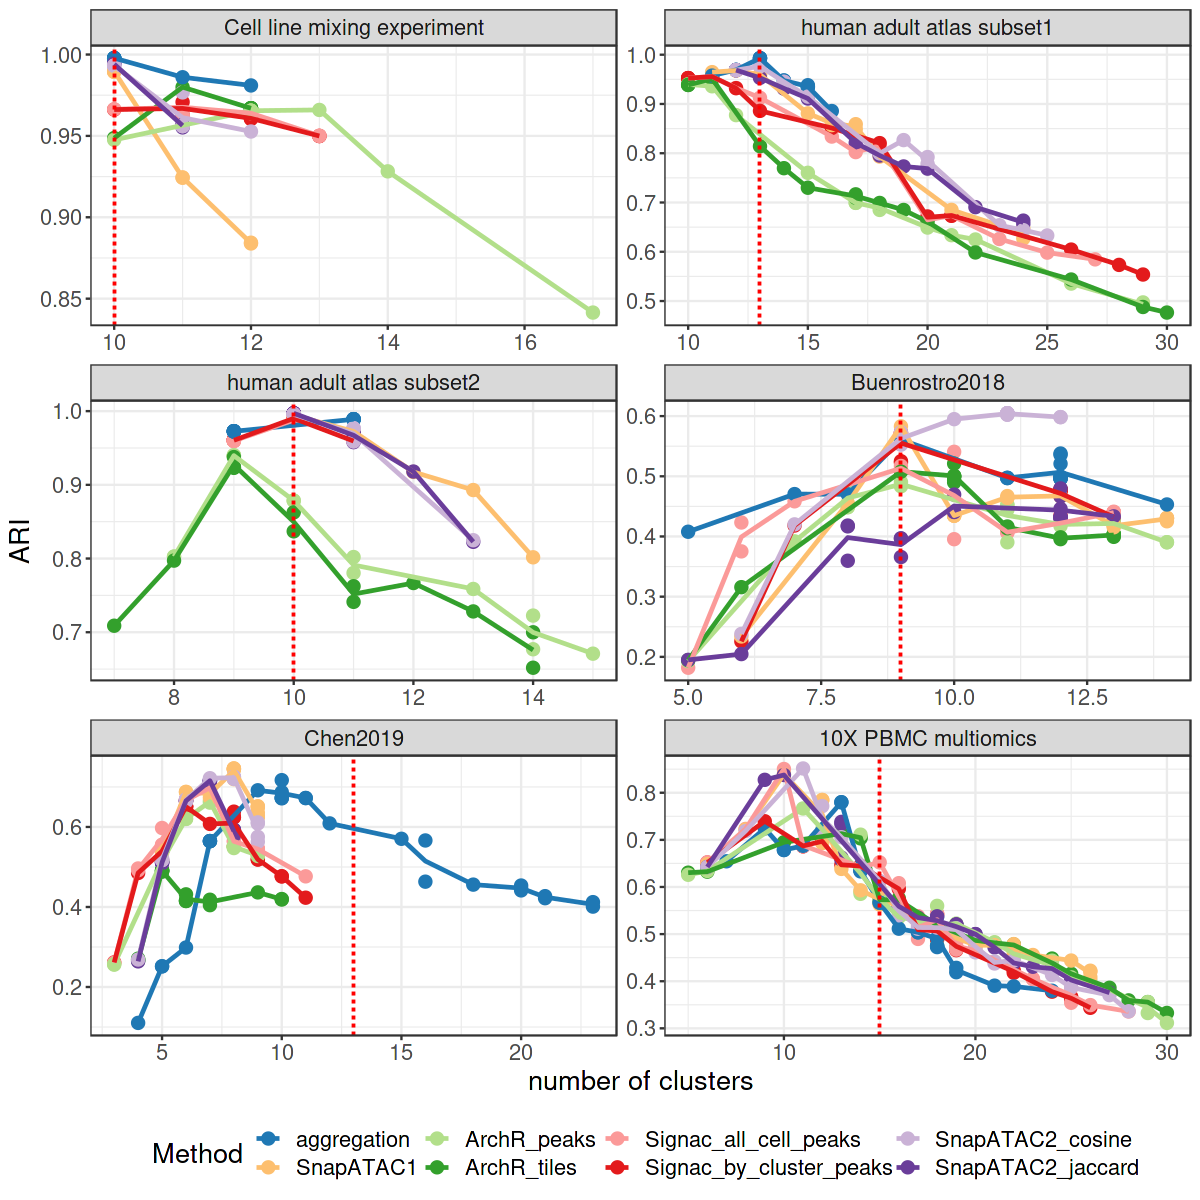

In [462]:
# ARI
options(repr.plot.width=10, repr.plot.height=10)
df_metrics_ari$long_method <- factor(df_metrics_ari$long_method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p1 <-
df_metrics_ari %>% #filter(n_clusters <= 30) %>% #filter(long_method=="SnapATAC2_cosine") %>% #filter(grepl(n,ndim)) %>%
  group_by(dataset, long_method, n_clusters) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=long_method)) + 
  geom_point(size=3) +
  geom_line(size=1, aes(x=n_clusters, y=mean_value, color=long_method)) + 
  facet_wrap(~dataset, scales = "free", nrow = 3, ncol = 2) + 
  geom_vline(data = vline_data, aes(xintercept = vline_x), linetype = "dashed", color = "red", size=0.8) + 
  xlab("number of clusters") +
  ylab("ARI") +
  labs(color="Method") +
  # geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
  theme_bw() +
  theme(text = element_text(size = 16),legend.position = "bottom") +
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
  scale_colour_manual(values = my_col_m3) #+ ylim(0, 0.8)
p1

In [463]:
# SVG graphics device
svg("Fig2A_ARI_ndim15_small.3.svg", width=9, height=10)

# Code of the plot
plot(p1)

# Close the graphics device
dev.off() 

png 
  2

In [230]:
# SVG graphics device
svg("Fig2A_ARI_ndim15_small.svg", width=13, height=6.5)

# Code of the plot
plot(p1)

# Close the graphics device
dev.off() 

png 
  2

In [227]:
# SVG graphics device
svg("Fig2A_ARI_ndim15.svg", width=16, height=8)

# Code of the plot
plot(p1)

# Close the graphics device
dev.off() 

png 
  2

## Fig 2B: Heatmaps

### 1. graph connection

In [ ]:
df_metrics_selected <- df_metrics[as.logical(df_metrics$metric %in% c("ARI")),]
df_metrics_selected <- df_metrics_selected %>% filter(ndim == 15) %>% filter(resolution == 0.1)

In [49]:
graph_name <- paste0("snn_ndim", 15)
df_g <- data.frame(method=c(), cell_type=c(), weak_cells=c(), weak_frac=c(), dataset=c())

for(i in 1:dim(df_metrics_selected[1])){
    sobj_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_selected$dataset2[i], "/", df_metrics_selected$snn_file[i])
    lm <- df_metrics_selected$long_method[i]
    dataset <- df_metrics_selected$dataset[i]
    sobj <- readRDS(sobj_file)
    print(dataset)
    g <- sobj@graphs[[graph_name]]
    attributes(g)$class <- "dgCMatrix"
    graph <- graph_from_adjacency_matrix(adjmatrix = g, mode = "undirected", weighted = TRUE, add.colnames = TRUE)
    label <- sobj$ground_truth
    label_ls <- unique(label)
    for(c in 1:length(label_ls)){
        print(c)
        res <- community_strength(graph, label, label_idx=c)
        df_g <- rbind(df_g, list(method=lm, cell_type=label_ls[c], weak_cells=res$j1, weak_frac=res$j1_frac, dataset=dataset))
    }
}

Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”


[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13


In [31]:
dim(df_g)

[1] 469   5

In [52]:
write.table(df_g, file="graph_metric_all_ndim15.tsv", sep='\t', row.names=FALSE)

In [57]:
df_gs <- df_g %>% group_by(dataset, method) %>% mutate(average = mean(weak_frac)) %>% subset(select=c(method, dataset, average))
df_gs <- df_gs[!duplicated(df_gs), ]
df_gs$dataset <- factor(df_gs$dataset, levels = dataset_name)
df_gs

method,dataset,average
<chr>,<fct>,<dbl>
Signac_by_cluster_peaks,Cell line mixing experiment,0.004244095
Signac_all_cell_peaks,Cell line mixing experiment,0.004163120
ArchR_tiles,Cell line mixing experiment,0.001719935
ArchR_peaks,Cell line mixing experiment,0.003004065
SnapATAC1,Cell line mixing experiment,0.003063441
aggregation,Cell line mixing experiment,0.001146118
SnapATAC2_jaccard,Cell line mixing experiment,0.002047837
SnapATAC2_cosine,Cell line mixing experiment,0.001908687
Signac_all_cell_peaks,human adult atlas subset1,0.009721488


In [ ]:
mapping <- list("Cell line mixing experiment" = "Cell line", 
                     "human adult atlas subset1" = "Atlas1", 
                     "human adult atlas subset2" = "Atlas2",
                     "Buenrostro2018" = "Buenrostro2018",
                     "Chen2019" = "Chen2019",
                     "10X PBMC multiomics" = "10XPBMC")
mapping2 <- list("Cell line mixing experiment" = "1", 
                     "human adult atlas subset1" = "1", 
                     "human adult atlas subset2" = "1",
                     "Buenrostro2018" = "2",
                     "Chen2019" = "2",
                     "10X PBMC multiomics" = "2")

In [78]:
df_gs <- df_gs %>% 
  mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[[as.character(dataset)]],
                             TRUE ~ "Other"))
df_gs <- df_gs %>% 
  mutate(dataset_type = case_when(as.character(dataset) %in% names(mapping2) ~ mapping2[[as.character(dataset)]],
                             TRUE ~ "Other"))

df_gs$dataset_short <- factor(df_gs$dataset_short, levels = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"))

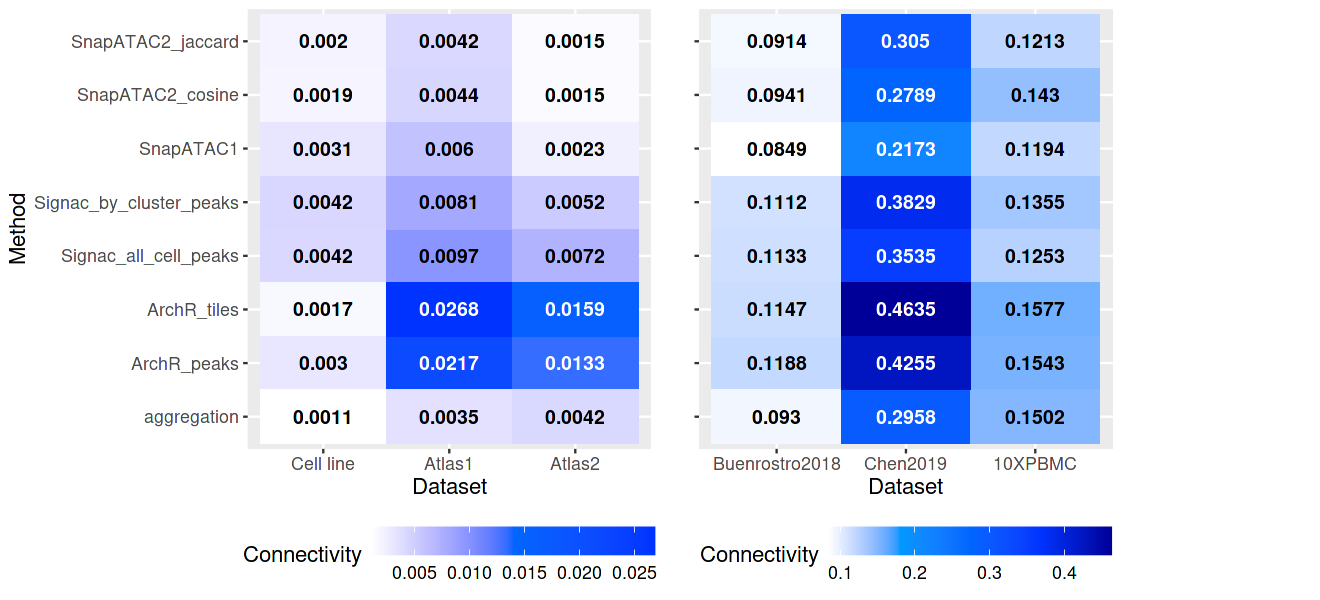

In [192]:
options(repr.plot.width=11, repr.plot.height=5)

metric_name <- "Connectivity"
p2.1 <- df_gs %>% 
        filter(dataset_type =="1") %>% 
        ggplot(aes(dataset_short, method,  fill = average, label = round(average, 4))) + 
        geom_tile() +
        geom_text(aes(color = ifelse(average > 0.01, "white", "black")), size = 4, fontface = "bold")  +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
        labs(y = "Method", x = "Dataset", fill=metric_name) +
        # geom_text(color = "black", size = 4, fontface = "bold")  +
        theme(legend.position = "bottom",text = element_text(size = 13)) +
      # theme_bw() + 
      # theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
        scale_fill_gradientn(colours = my_color_2, guide = guide_colourbar(barwidth = unit(6, "cm")))  +
        scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

  # guides(fill = guide_colorbar(barheight = unit(4, "cm")))

p2.2 <- df_gs %>% 
        filter(dataset_type =="2") %>% 
        ggplot(aes(dataset_short, method,  fill = average, label = round(average, 4))) + 
        geom_tile() +
        geom_text(aes(color = ifelse(average > 0.2, "white", "black")), size = 4, fontface = "bold")  +
        labs(y = "", x = "Dataset", fill=metric_name) +
        theme(axis.text.y = element_blank(),legend.position = "bottom", text = element_text(size = 13)) + 
        scale_fill_gradientn(colours = my_color_3, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
        scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

# Create plot layout with two parts
p2 <- ggdraw() +
  draw_plot(p2.1, 0, 0, 0.5, 1) +
  draw_plot(p2.2, 0.5, 0, 0.35, 1)

# Print the result
print(p2)

In [231]:
# SVG graphics device
svg("Fig2B_heatmap_connectivity_ndim15.svg", width=11, height=5)

# Code of the plot
plot(p2)

# Close the graphics device
dev.off() 

png 
  2

### 2. Silhouette score

In [123]:
unique(df_metrics$metric)

[1] "ARI"              "AMI"              "MI"               "VI"              
 [5] "Silhouette"       "Silhouette_label" "cLISI"            "cLISI_label"     
 [9] "AW"               "AV"               "AW2"              "AV2"             
[13] "ARI2"

In [124]:
# Others
df_metrics_silhouette <- df_metrics %>% filter(metric == "Silhouette_label") %>% filter(ndim == 15)
df_metrics_silhouette$dataset <- factor(df_metrics_silhouette$dataset, levels = dataset_name)

df_metrics_lisi <- df_metrics %>% filter(metric == "cLISI_label") %>% filter(ndim == 15)
df_metrics_lisi$dataset <- factor(df_metrics_lisi$dataset, levels = dataset_name)

In [216]:
df_metrics_silhouette_tmp <- subset(df_metrics_silhouette, select = c(value, method, long_method, feature_type, tile_size, distance, ndim, rds_file, snn_file, dataset, k_optimal, dataset2))
df_metrics_silhouette_tmp <- df_metrics_silhouette_tmp[!duplicated(subset(df_metrics_silhouette_tmp, select = -rds_file)), ]
dim(df_metrics_silhouette_tmp)

[1] 48 12

In [221]:
df_hm <- data.frame(cell_type=c(), negative_fraction=c(), long_method=c(), dataset=c(), dataset2=c())
for(i in 1:dim(df_metrics_silhouette_tmp)[1]){
    rds_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_silhouette_tmp$dataset2[i], "/", df_metrics_silhouette_tmp$rds_file[i])
    res <- readRDS(rds_file)
    df_sil <- data.frame(res$sil2$sil)[,c("cluster", "sil_width")]
    
    snn_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_silhouette_tmp$dataset2[i], "/", df_metrics_silhouette_tmp$snn_file[i])
    sobj <- readRDS(snn_file)
    true_labels <- sobj$ground_truth
    
    df_sil$cell_type <- unlist(lapply(df_sil$cluster, function(x){levels(true_labels)[x]}))
    label_colname <- "cell_type"

    df_sil <- df_sil[order(df_sil[,"cluster"], -df_sil$sil_width), ]
    df_sil$negative_sil <- df_sil$sil_width < 0

    df_sil_neg <- df_sil %>%
    group_by(cell_type) %>%
    summarise(negative_count = sum(negative_sil), count = n()) 

    df_sil_neg$negative_fraction <- df_sil_neg$negative_count/df_sil_neg$count
    df_sil_neg$long_method <- df_metrics_silhouette_tmp$long_method[i]
    df_sil_neg$dataset <- df_metrics_silhouette_tmp$dataset[i]
    df_sil_neg$dataset2 <- df_metrics_silhouette_tmp$dataset2[i]

    df_hm <- rbind(df_hm, df_sil_neg[,c("cell_type", "negative_fraction", "long_method", "dataset", "dataset2")])
}

In [222]:
dim(df_hm)
head(df_hm)

[1] 560   5

cell_type,negative_fraction,long_method,dataset,dataset2
<chr>,<dbl>,<chr>,<fct>,<chr>
293T,0.000000000,Signac_by_cluster_peaks,Cell line mixing experiment,Cell_line_mixing
GM12878,0.163420830,Signac_by_cluster_peaks,Cell line mixing experiment,Cell_line_mixing
HT1080,0.004530011,Signac_by_cluster_peaks,Cell line mixing experiment,Cell_line_mixing
HeLa,0.001323335,Signac_by_cluster_peaks,Cell line mixing experiment,Cell_line_mixing
Jurkat,0.001762891,Signac_by_cluster_peaks,Cell line mixing experiment,Cell_line_mixing
K562,0.048857368,Signac_by_cluster_peaks,Cell line mixing experiment,Cell_line_mixing


In [223]:
write.table(df_hm, file="Negative_silhouette_frac_all_ndim15.tsv", sep='\t', row.names=FALSE)

In [129]:
df_metrics_silhouette_s <- df_metrics_silhouette %>% 
                            group_by(dataset, long_method) %>% 
                            mutate(average = mean(value)) %>% 
                            subset(select=c(long_method, dataset, average))
df_metrics_silhouette_s <- df_metrics_silhouette_s[!duplicated(df_metrics_silhouette_s), ]
df_metrics_silhouette_s$dataset <- factor(df_metrics_silhouette_s$dataset, levels = dataset_name)
df_metrics_silhouette_s

long_method,dataset,average
<chr>,<fct>,<dbl>
Signac_by_cluster_peaks,Cell line mixing experiment,0.31558295
Signac_all_cell_peaks,Cell line mixing experiment,0.31006313
ArchR_tiles,Cell line mixing experiment,0.38007057
ArchR_peaks,Cell line mixing experiment,0.37944704
SnapATAC1,Cell line mixing experiment,0.34499508
aggregation,Cell line mixing experiment,0.64872353
SnapATAC2_jaccard,Cell line mixing experiment,0.33191264
SnapATAC2_cosine,Cell line mixing experiment,0.32320344
Signac_all_cell_peaks,human adult atlas subset1,0.38989476


In [130]:
df_metrics_silhouette_s <- df_metrics_silhouette_s %>% 
  mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[[as.character(dataset)]],
                             TRUE ~ "Other"))
df_metrics_silhouette_s <- df_metrics_silhouette_s %>% 
  mutate(dataset_type = case_when(as.character(dataset) %in% names(mapping2) ~ mapping2[[as.character(dataset)]],
                             TRUE ~ "Other"))

df_metrics_silhouette_s$dataset_short <- factor(df_metrics_silhouette_s$dataset_short, levels = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"))

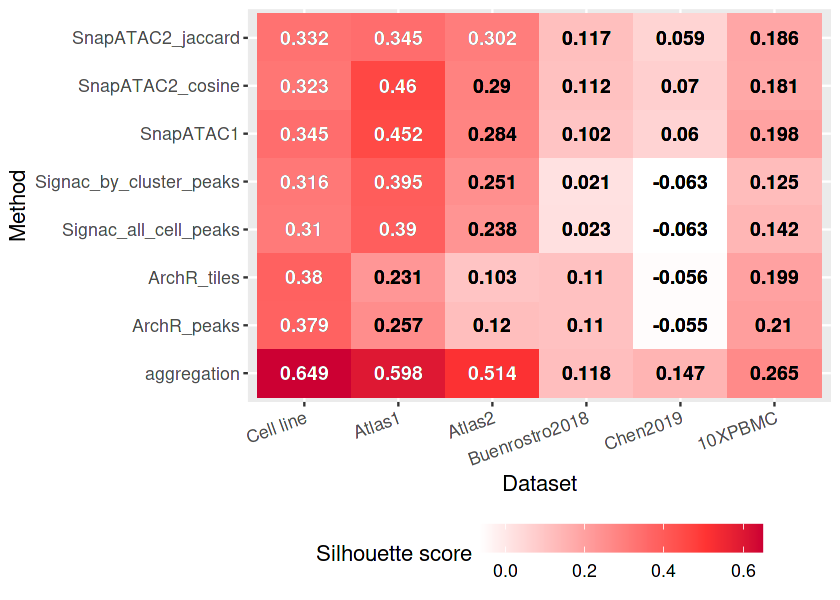

In [199]:
options(repr.plot.width=7, repr.plot.height=5)

p3 <- ggplot(df_metrics_silhouette_s, aes(dataset_short, long_method,  fill = average, label = round(average, 3))) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Dataset", fill="Silhouette score") +
      geom_text(color = "black", size = 4, fontface = "bold")  +
      theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      theme(text = element_text(size = 13),legend.position = "bottom")+
      geom_text(aes(color = ifelse(average > 0.3, "white", "black")), size = 4, fontface = "bold")  +
      scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p3)

In [232]:
# SVG graphics device
svg("Fig2B_heatmap_Silhouette_ndim15.svg", width=7, height=5)

# Code of the plot
plot(p3)

# Close the graphics device
dev.off() 

png 
  2

In [240]:
ordered_dataset_shortname <- c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC")

In [238]:
# Must contain column name "value"
average_over_classes <- function(df_metric, ordered_dataset_name, ordered_dataset_shortname, mapping_short_dataset, mapping_dataset_type){
    df_avg <- df_metric %>% 
    group_by(dataset, long_method) %>% 
    mutate(average = mean(value)) %>% 
    subset(select=c(long_method, dataset, average))
    
    df_avg <- df_avg[!duplicated(df_avg), ]
    df_avg$dataset <- factor(df_avg$dataset, levels = ordered_dataset_name)

    df_avg <- df_avg %>% 
      mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[[as.character(dataset)]],
                                 TRUE ~ "Other"))
    df_avg <- df_avg %>% 
      mutate(dataset_type = case_when(as.character(dataset) %in% names(mapping2) ~ mapping2[[as.character(dataset)]],
                                 TRUE ~ "Other"))

    df_avg$dataset_short <- factor(df_avg$dataset_short, levels = ordered_dataset_shortname)
    return(df_avg)
}

In [243]:
colnames(df_hm)[colnames(df_hm) == "negative_fraction"] <- "value"
df_sil_frac <- average_over_classes(df_hm, dataset_name, ordered_dataset_shortname, mapping, mapping2)

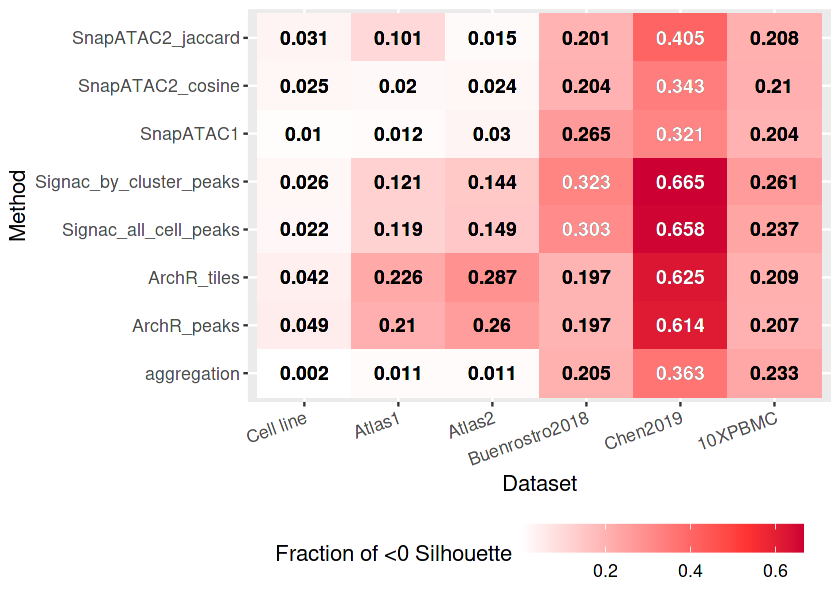

In [246]:
options(repr.plot.width=7, repr.plot.height=5)

p4 <- ggplot(df_sil_frac, aes(dataset_short, long_method,  fill = average, label = round(average, 3))) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Dataset", fill="Fraction of <0 Silhouette") +
      geom_text(color = "black", size = 4, fontface = "bold")  +
      theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      theme(text = element_text(size = 13),legend.position = "bottom")+
      geom_text(aes(color = ifelse(average > 0.3, "white", "black")), size = 4, fontface = "bold")  +
      scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p4)

In [248]:
# SVG graphics device
svg("Fig2B_heatmap_Sil_frac_ndim15.svg", width=7, height=5)

# Code of the plot
plot(p4)

# Close the graphics device
dev.off() 

png 
  2

In [252]:
df_lisi_avg <- average_over_classes(df_metrics_lisi, dataset_name, ordered_dataset_shortname, mapping, mapping2)

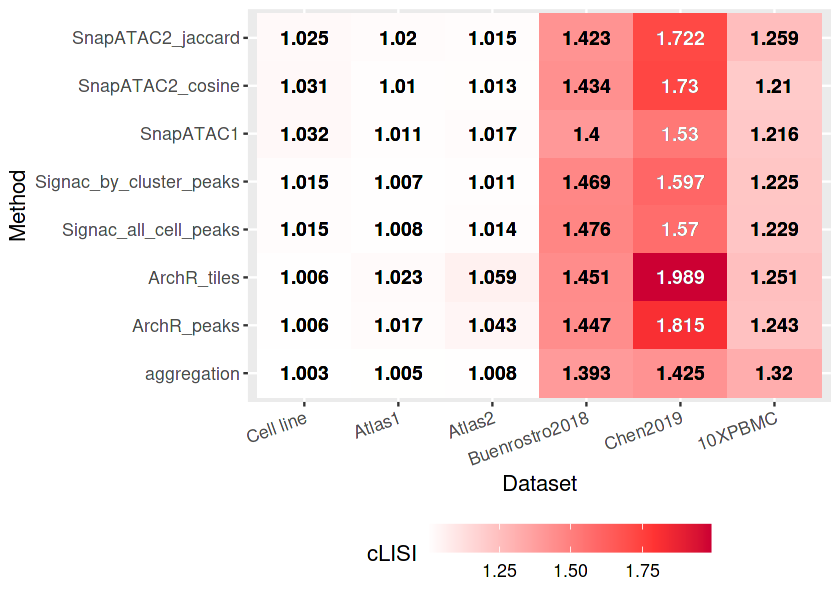

In [255]:
options(repr.plot.width=7, repr.plot.height=5)

p5 <- ggplot(df_lisi_avg, aes(dataset_short, long_method,  fill = average, label = round(average, 3))) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Dataset", fill="cLISI") +
      geom_text(color = "black", size = 4, fontface = "bold")  +
      theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      theme(text = element_text(size = 13),legend.position = "bottom")+
      geom_text(aes(color = ifelse(average > 1.5, "white", "black")), size = 4, fontface = "bold")  +
      scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p5)

In [257]:
# SVG graphics device
svg("Fig2B_heatmap_cLISI_ndim15.svg", width=7, height=5)

# Code of the plot
plot(p5)

# Close the graphics device
dev.off() 

png 
  2

## Fig 2B: grouped sorted barplot

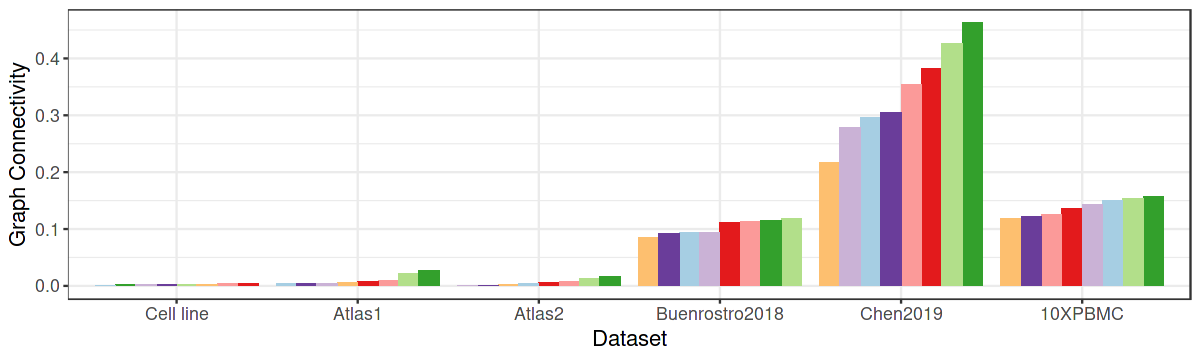

In [365]:
options(repr.plot.width=10, repr.plot.height=3)
df_gs$method <- factor(df_gs$method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p2.3 <- df_gs %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="Dataset", y="Graph Connectivity", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "none") #+ coord_cartesian(ylim = c(1, 2))

p2.3

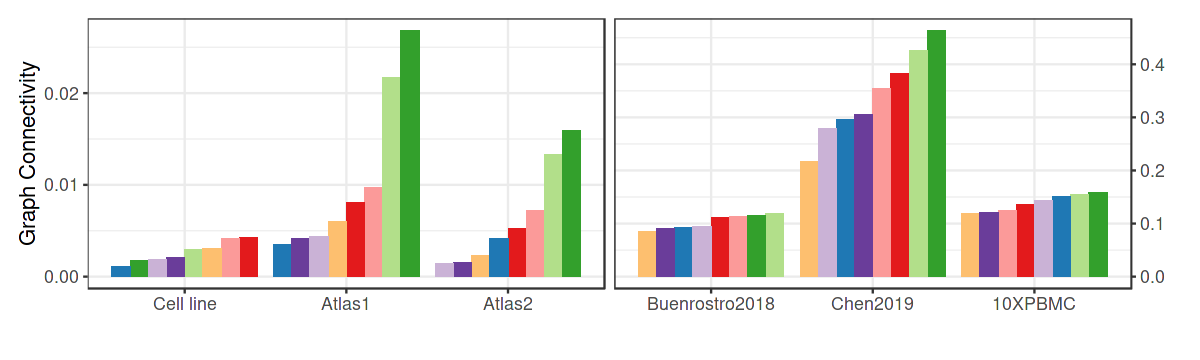

In [456]:
options(repr.plot.width=10, repr.plot.height=3)
df_gs$method <- factor(df_gs$method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p2.3.1 <- df_gs %>% 
        filter(dataset_type =="1") %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="Graph Connectivity", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "none") #+ coord_cartesian(ylim = c(1, 2))

p2.3.2 <- df_gs %>% 
        filter(dataset_type =="2") %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "none", plot.margin = unit(c(0,0,0,0), "cm"))+
        scale_y_continuous(position = "right") #+ coord_cartesian(ylim = c(1, 2))

p2.3.3 <- p2.3.1 + p2.3.2 + theme(plot.margin = unit(c(0, 0, -1, 0), "cm"))
p2.3.3

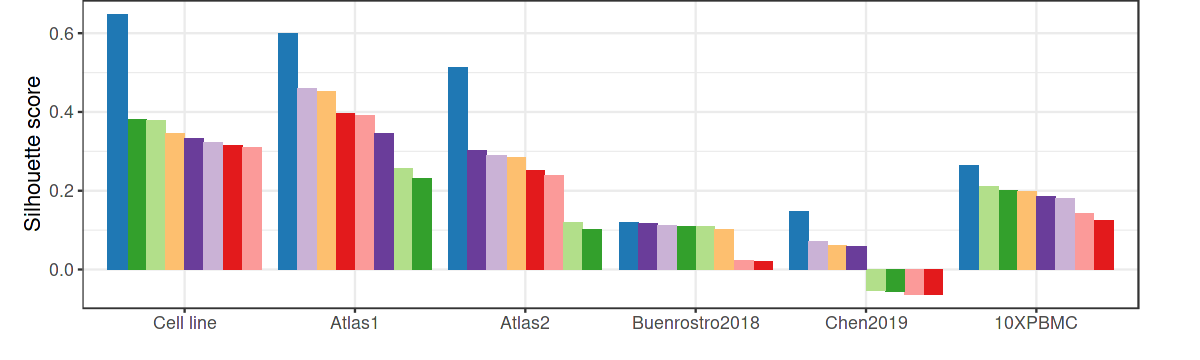

In [457]:
options(repr.plot.width=10, repr.plot.height=3)
df_metrics_silhouette_s$long_method <- factor(df_metrics_silhouette_s$long_method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p3.2 <- df_metrics_silhouette_s %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(-average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = long_method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="Silhouette score", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "none", plot.margin = unit(c(0,1.3,0,0.5), "cm")) #+ coord_cartesian(ylim = c(1, 2))

p3.2

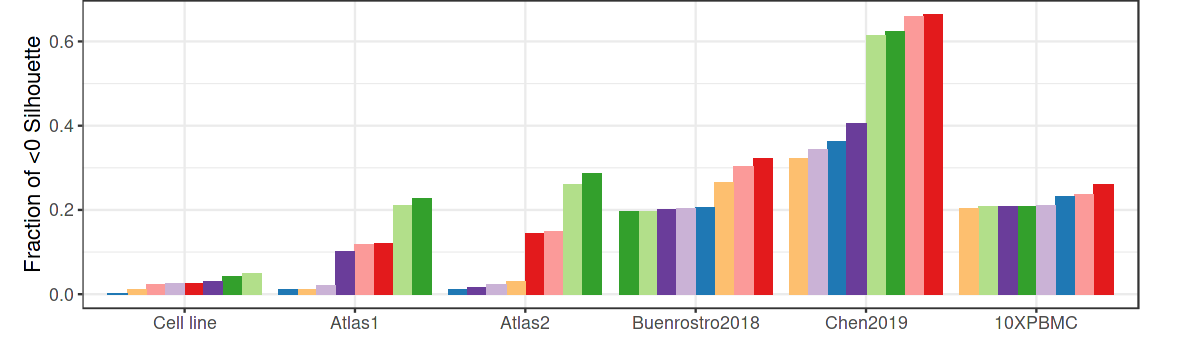

In [458]:
options(repr.plot.width=10, repr.plot.height=3)
df_sil_frac$long_method <- factor(df_sil_frac$long_method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p4.2 <- df_sil_frac %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = long_method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="Fraction of <0 Silhouette", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "none", plot.margin = unit(c(0,1.3,0,0.5), "cm")) #+ coord_cartesian(ylim = c(1, 2))

p4.2

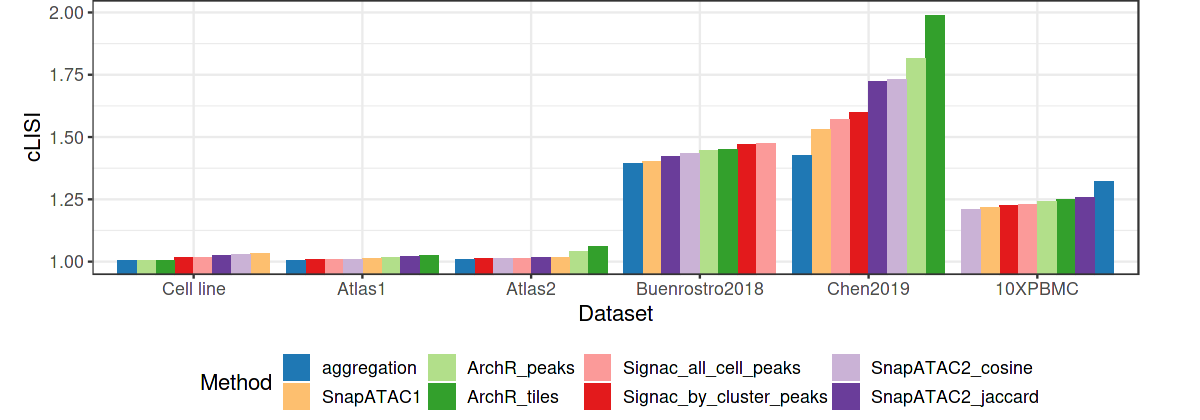

In [459]:
options(repr.plot.width=10, repr.plot.height=3.5)
df_lisi_avg$long_method <- factor(df_lisi_avg$long_method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))
p5.2 <- df_lisi_avg %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = long_method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="Dataset", y="cLISI", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "bottom", plot.margin = unit(c(0,1.3,0,0.5), "cm")) + 
        coord_cartesian(ylim = c(1, 2))

p5.2

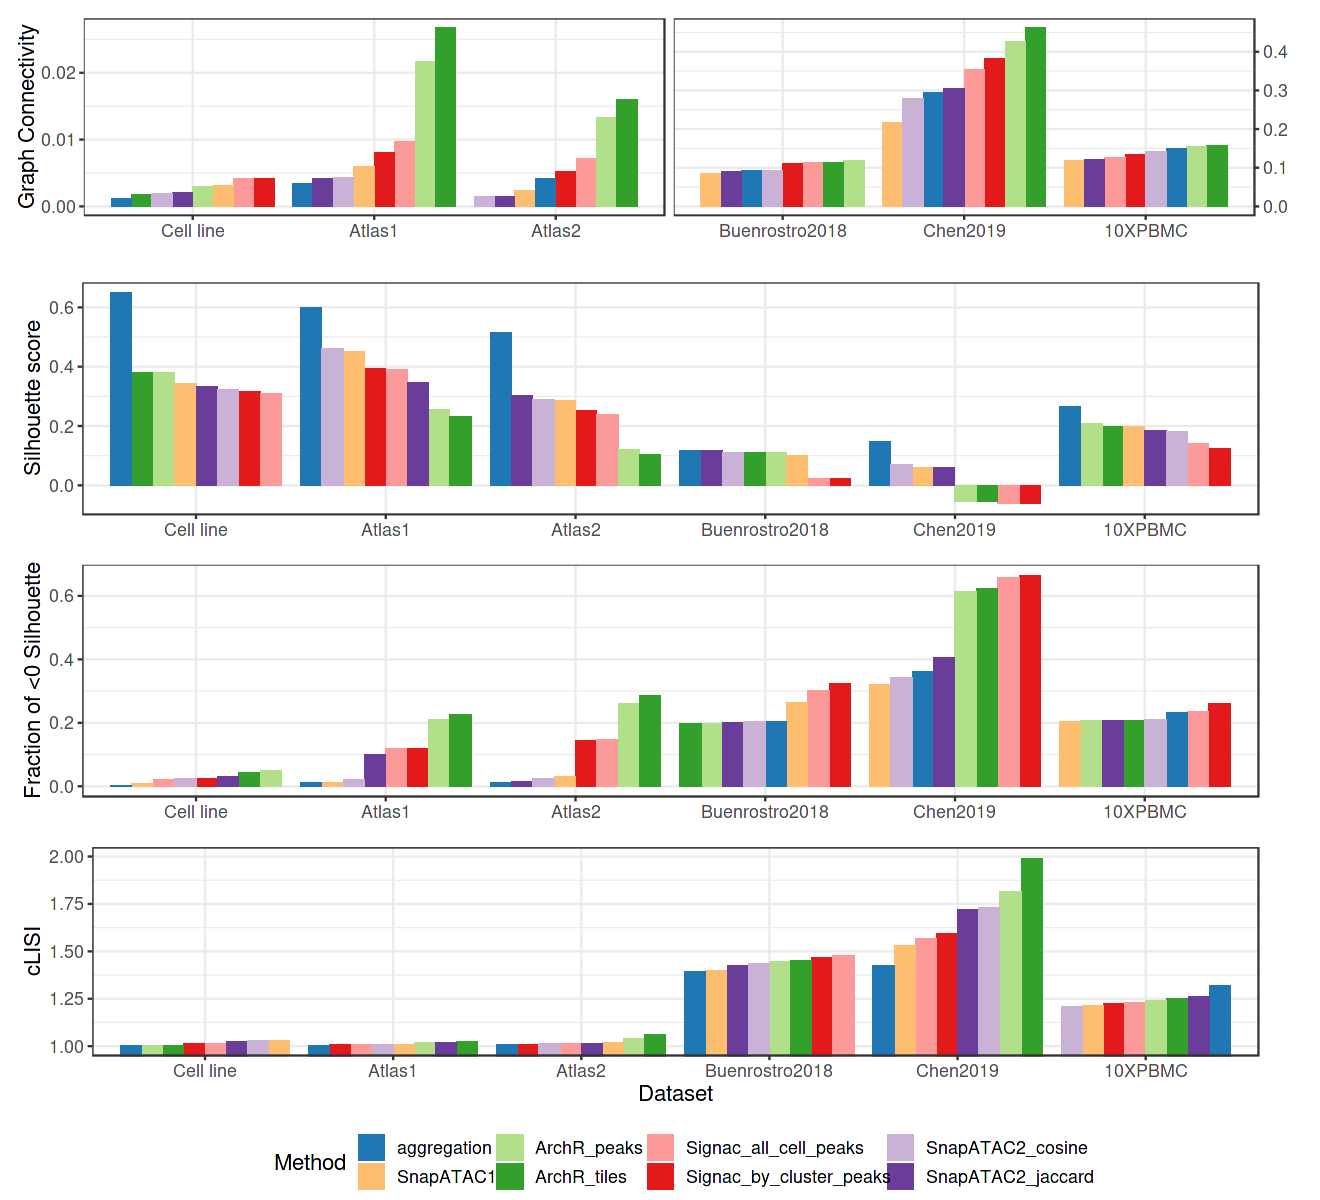

In [460]:
options(repr.plot.width=11, repr.plot.height=10)
p6 <- ggarrange(p2.3.3, p3.2, p4.2, p5.2, nrow = 4, ncol = 1, heights = c(4,4,4,5)) 
p6

In [461]:
# SVG graphics device
svg("Fig2B_ranked_barplot_ndim15.svg", width=10, height=9)

# Code of the plot
plot(p6)

# Close the graphics device
dev.off() 

png 
  2

# Fig 3

In [ ]:
options(repr.plot.width=11, repr.plot.height=5)

ggplot(df, aes(cell_type, method,  fill = average, label = round(weak_frac, 2))) + 
  geom_tile() +
  # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
  labs(y = "Method", x = "Cell type") +
  geom_text(color = "black", size = 4, fontface = "bold")  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
  scale_fill_gradientn(colours = my_color, guide = guide_colourbar())